# Predicting Titanic Disaster Survivors using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone was likely to survive titanic disaster based on their passenger attributes.

We're going to take the following approach:

 1.Problem Definition<br>
 2.Data<br>
 3.Evaluation<br>
 4.Features<br>
 5.Modelling<br>
 6.Experimentation<br>
 7.Final Prediction<br>
 
 ## 1.Problem Definition
 > Given personal parameters about a passenger, can we predict whether or not they were likely to survive the titanic disaster?
 
 ## 2.Data
 The original data came from the https://www.kaggle.com/competitions/titanic/data.
 
 ## 3.Evaluation
 > To get a reasonable accuracy percentage in predicting whether a passanger was likely to survive the titanic disaster.
 
 ## 4.Features
 This is where you'll get different information about each of the features in your data. You can do this via doing your own      research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).
 
 ### Create data dictionary
 
  1.survival - (0 = No; 1 = Yes)<br>
  2.pclass - Ticket class
   * 1 = 1st
   * 2 = 2nd
   * 3 = 3rd <br>

  3.sex - gender
   * Male
   * Female <br>
   
  4.Age - Age in years<br>
  5.sibsp - # of siblings / spouses aboard the Titanic<br>
  6.parch - # of parents / children aboard the Titanic<br>
  7.ticket - Ticket number<br>
  8.fare - Passenger Fare<br>
  9.cabin - Cabin number<br>
  10.embarked - Port of Embarkation
   * C = Cherbourg
   * Q = Queenstown
   * S = Southampton


## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [122]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [123]:
df = pd.read_csv("train.csv")
df.shape # (rows, colums)

(891, 12)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

 1.What question(s) are you trying to solve?<br>
 2.What kind of data do we have and how do we treat different types?<br>
 3.What's missing from the data and how do you deal with it?<br>
 4.Where are the outliers and why should you care about them?<br>
 5.How can you add, change or remove features to get more out of your data?<br>

In [124]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [126]:
# Let's find out how many of each class there
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

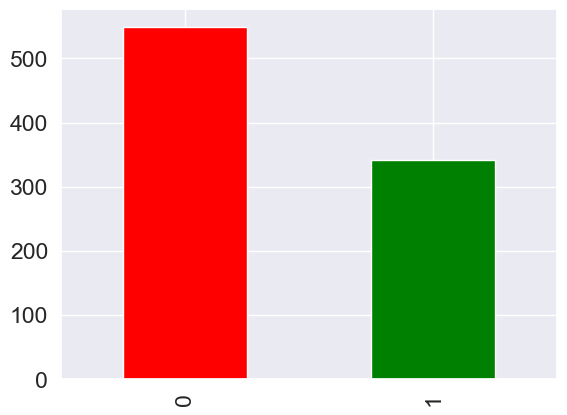

In [127]:
df["Survived"].value_counts().plot(kind="bar", color=["Red", "Green"]);

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [129]:
# Are there any missing values?
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Make sure all Data is Numerical 

In [195]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Sex","Embarked"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)]
                               ,remainder = "passthrough")

transformed_df = transformer.fit_transform(df)
transformed_df

array([[0.0, 1.0, 0.0, ..., 'A/5 21171', 7.25, nan],
       [1.0, 0.0, 1.0, ..., 'PC 17599', 71.2833, 'C85'],
       [1.0, 0.0, 0.0, ..., 'STON/O2. 3101282', 7.925, nan],
       ...,
       [1.0, 0.0, 0.0, ..., 'W./C. 6607', 23.45, nan],
       [0.0, 1.0, 1.0, ..., '111369', 30.0, 'C148'],
       [0.0, 1.0, 0.0, ..., '370376', 7.75, nan]], dtype=object)

In [196]:
pd.DataFrame(transformed_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,NaN
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.925,NaN
3,1.0,0.0,0.0,0.0,1.0,0.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1,C123
4,0.0,1.0,0.0,0.0,1.0,0.0,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0,NaN
887,1.0,0.0,0.0,0.0,1.0,0.0,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0,B42
888,1.0,0.0,0.0,0.0,1.0,0.0,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.45,NaN
889,0.0,1.0,1.0,0.0,0.0,0.0,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0,C148


In [198]:
new_df = pd.get_dummies(df[["Sex","Embarked","Pclass","PassengerId","Survived","Age","Parch","Fare","SibSp"]])
new_df

,Pclass,PassengerId,Survived,Age,Parch,Fare,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,22.0,0,7.2500,1,0,1,0,0,1
1,1,2,1,38.0,0,71.2833,1,1,0,1,0,0
2,3,3,1,26.0,0,7.9250,0,1,0,0,0,1
3,1,4,1,35.0,0,53.1000,1,1,0,0,0,1
4,3,5,0,35.0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,887,0,27.0,0,13.0000,0,0,1,0,0,1
887,1,888,1,19.0,0,30.0000,0,1,0,0,0,1
888,3,889,0,NaN,2,23.4500,1,1,0,0,0,1
889,1,890,1,26.0,0,30.0000,0,0,1,1,0,0


In [199]:
# Fill the missing Numerical values
new_df.isna().sum()

Pclass           0
PassengerId      0
Survived         0
Age            177
Parch            0
Fare             0
SibSp            0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [200]:
new_df["Age"].fillna(new_df["Age"].mean(),inplace=True ) 

In [201]:
new_df.describe()

,Pclass,PassengerId,Survived,Age,Parch,Fare,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,446.000000,0.383838,29.699118,0.381594,32.204208,0.523008,0.352413,0.647587,0.188552,0.086420,0.722783
std,0.836071,257.353842,0.486592,13.002015,0.806057,49.693429,1.102743,0.477990,0.477990,0.391372,0.281141,0.447876
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,223.500000,0.000000,22.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,446.000000,0.000000,29.699118,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,668.500000,1.000000,35.000000,0.000000,31.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,891.000000,1.000000,80.000000,6.000000,512.329200,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Survival Frequency according to Sex

In [202]:
new_df.Sex_male.value_counts()

1    577
0    314
Name: Sex_male, dtype: int64

In [203]:
# Compare Survived column with sex column
pd.crosstab(new_df.Survived, new_df.Sex_male)

Sex_male,0,1
Survived,,
0,81,468
1,233,109


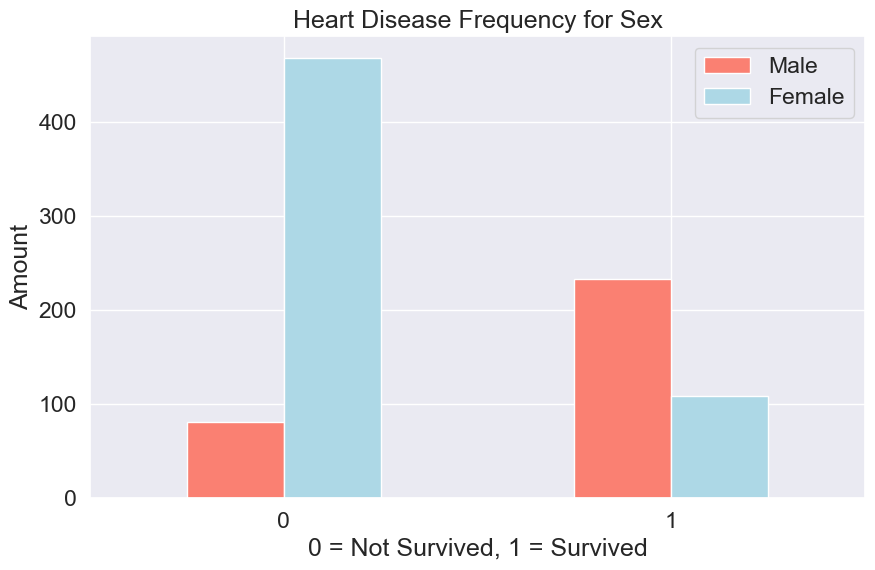

In [204]:
# Create a plot of crosstab
pd.crosstab(new_df.Survived, new_df.Sex_male).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Amount")
plt.legend(["Male", "Female"]);
plt.xticks(rotation=0);

## Age vs Number of parents or children aboard the Titanic for survival

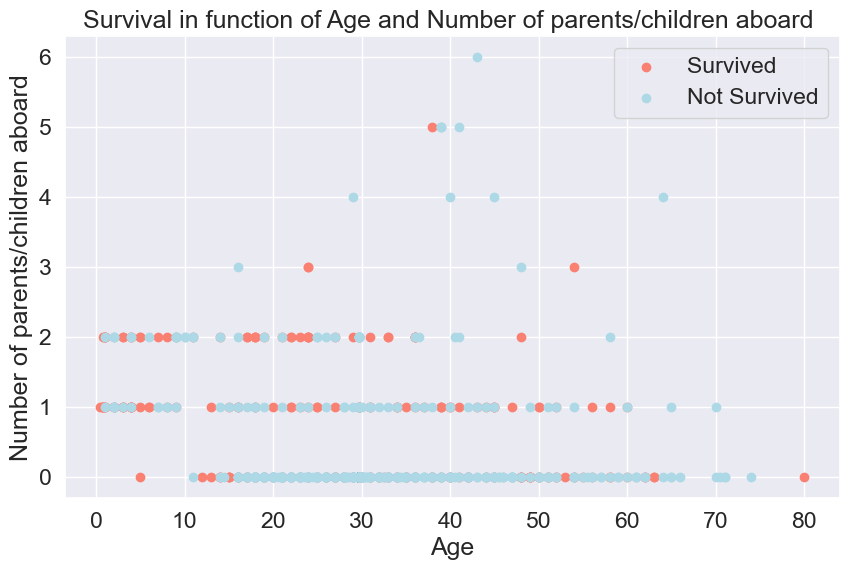

In [205]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(new_df.Age[new_df.Survived==1],
            new_df.Parch[new_df.Survived==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(new_df.Age[new_df.Survived==0],
            new_df.Parch[new_df.Survived==0],
            c="lightblue")

# Add some helpful info
plt.title("Survival in function of Age and Number of parents/children aboard ")
plt.xlabel("Age")
plt.ylabel("Number of parents/children aboard")
plt.legend(["Survived", "Not Survived"]);


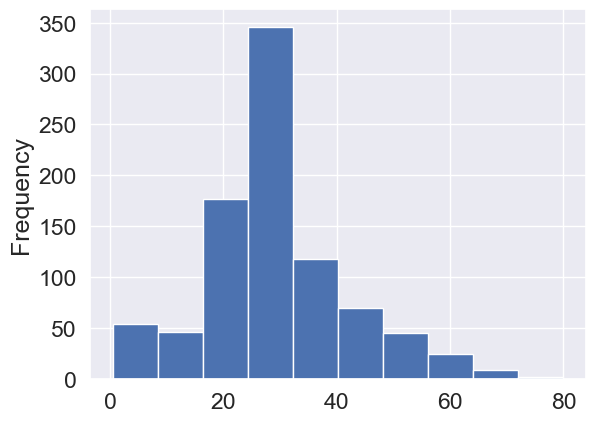

In [206]:
# Check the distribution of the age column with a histogram
new_df.Age.plot.hist();

## Survival frequency per Ticket class type

  2.pclass - Ticket class
   * 1 = 1st
   * 2 = 2nd
   * 3 = 3rd <br>

In [207]:
pd.crosstab(new_df.Pclass, new_df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


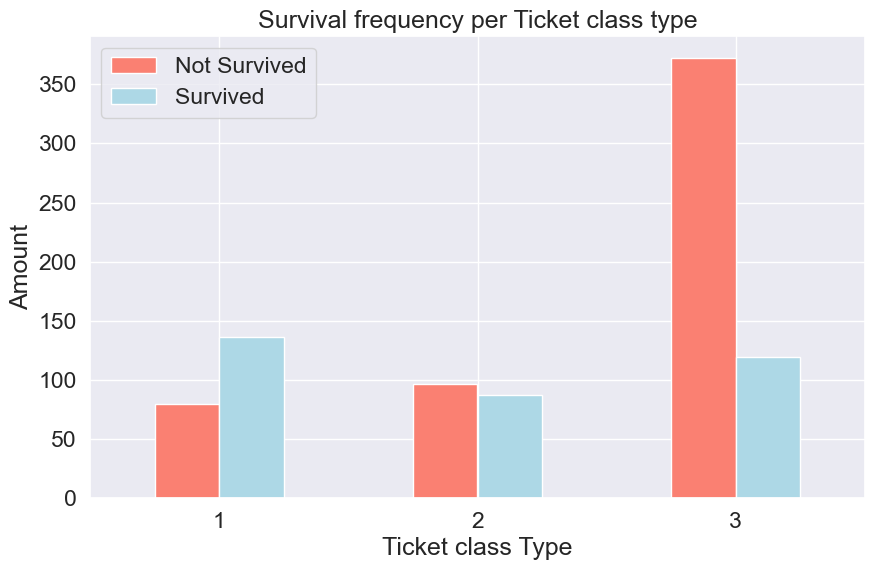

In [208]:
# Make the crosstab more visual
pd.crosstab(new_df.Pclass, new_df.Survived).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Survival frequency per Ticket class type")
plt.xlabel("Ticket class Type")
plt.ylabel("Amount")
plt.legend(["Not Survived", "Survived"])
plt.xticks(rotation=0);

## 5.Modelling

In [209]:
new_df.head()

,Pclass,PassengerId,Survived,Age,Parch,Fare,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,22.0,0,7.2500,1,0,1,0,0,1
1,1,2,1,38.0,0,71.2833,1,1,0,1,0,0
2,3,3,1,26.0,0,7.9250,0,1,0,0,0,1
3,1,4,1,35.0,0,53.1000,1,1,0,0,0,1
4,3,5,0,35.0,0,8.0500,0,0,1,0,0,1


In [210]:
# Split data into X and y
X = new_df.drop("Survived", axis=1)

y = new_df["Survived"]

In [211]:
X

,Pclass,PassengerId,Age,Parch,Fare,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.000000,0,7.2500,1,0,1,0,0,1
1,1,2,38.000000,0,71.2833,1,1,0,1,0,0
2,3,3,26.000000,0,7.9250,0,1,0,0,0,1
3,1,4,35.000000,0,53.1000,1,1,0,0,0,1
4,3,5,35.000000,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,887,27.000000,0,13.0000,0,0,1,0,0,1
887,1,888,19.000000,0,30.0000,0,1,0,0,0,1
888,3,889,29.699118,2,23.4500,1,1,0,0,0,1
889,1,890,26.000000,0,30.0000,0,0,1,1,0,0


In [212]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [213]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [214]:
X_train

,Pclass,PassengerId,Age,Parch,Fare,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
331,1,332,45.500000,0,28.5000,0,0,1,0,0,1
733,2,734,23.000000,0,13.0000,0,0,1,0,0,1
382,3,383,32.000000,0,7.9250,0,0,1,0,0,1
704,3,705,26.000000,0,7.8542,1,0,1,0,0,1
813,3,814,6.000000,2,31.2750,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,3,107,21.000000,0,7.6500,0,1,0,0,0,1
270,1,271,29.699118,0,31.0000,0,0,1,0,0,1
860,3,861,41.000000,0,14.1083,2,0,1,0,0,1
435,1,436,14.000000,2,120.0000,1,1,0,0,0,1


In [215]:
y_train, len(y_train)

(331    0
 733    0
 382    0
 704    0
 813    0
       ..
 106    1
 270    0
 860    0
 435    1
 102    0
 Name: Survived, Length: 712, dtype: int64,
 712)

Now we've got our data split into training and test sets, it's time to build a machine learning model.<br>

We'll train it (find the patterns) on the training set.<br>

And we'll test it (use the patterns) on the test set.<br>

We're going to try 3 different machine learning models:<br>

 1.Logistic Regression<br>
 2.K-Nearest Neighbours Classifier<br>
 3.Random Forest Classifier<br>


In [216]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [217]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\rlohi\Desktop\kaggle comps\titanic_survs\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7877094972067039,
 'KNN': 0.659217877094972,
 'Random Forest': 0.8268156424581006}

## Model Comparison

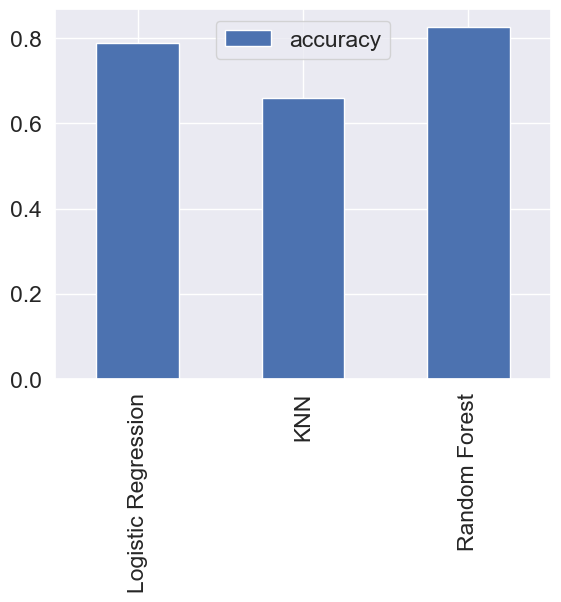

In [218]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning (by hand)

In [219]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [220]:
train_scores

[1.0,
 0.8075842696629213,
 0.8047752808988764,
 0.7485955056179775,
 0.7542134831460674,
 0.7247191011235955,
 0.7219101123595506,
 0.7008426966292135,
 0.7050561797752809,
 0.6980337078651685,
 0.6882022471910112,
 0.6867977528089888,
 0.6924157303370787,
 0.6924157303370787,
 0.6910112359550562,
 0.6853932584269663,
 0.6839887640449438,
 0.672752808988764,
 0.6783707865168539,
 0.672752808988764]

In [221]:
test_scores

[0.5977653631284916,
 0.6256983240223464,
 0.5865921787709497,
 0.6312849162011173,
 0.659217877094972,
 0.6536312849162011,
 0.6536312849162011,
 0.6424581005586593,
 0.6536312849162011,
 0.6480446927374302,
 0.6480446927374302,
 0.6424581005586593,
 0.6368715083798883,
 0.6480446927374302,
 0.6480446927374302,
 0.659217877094972,
 0.6703910614525139,
 0.6536312849162011,
 0.6871508379888268,
 0.6759776536312849]

Maximum KNN score on the test data: 68.72%


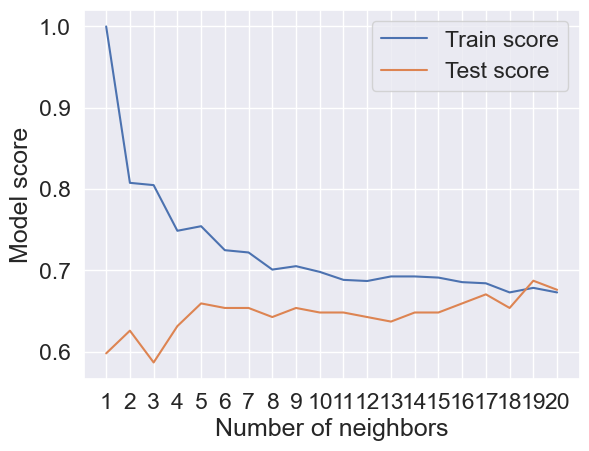

In [222]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [223]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [224]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [225]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [226]:
rs_log_reg.score(X_test, y_test)

0.7932960893854749

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [227]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [228]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [229]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8044692737430168

## Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [230]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [231]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [232]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.7988826815642458

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [233]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [234]:
y_preds

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [235]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

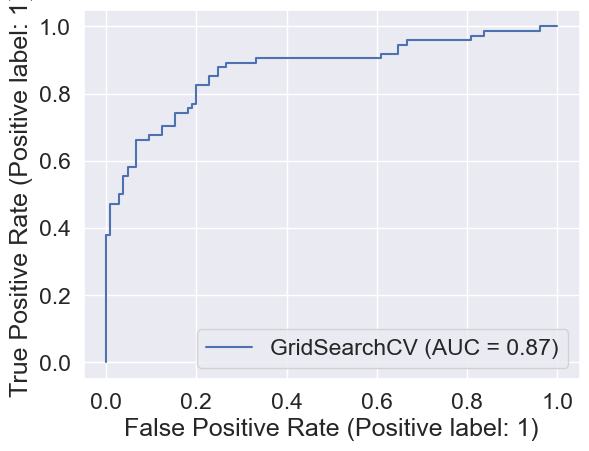

In [236]:
# Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,X_test, y_test)

In [237]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[89 16]
 [20 54]]


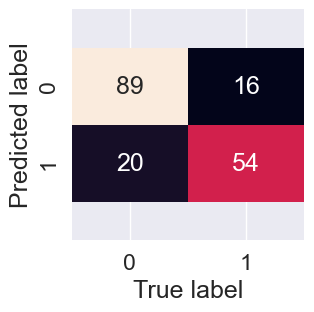

In [238]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [239]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [240]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [241]:
# Create a new classifier with best parameters
clf = LogisticRegression(C= 117.21022975334793,
                         solver="liblinear")

In [242]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.78212291, 0.78651685, 0.78089888, 0.76966292, 0.80898876])

In [243]:
cv_acc = np.mean(cv_acc)
cv_acc

0.785638064151654

In [244]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.7325453034391181

In [245]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.6957800511508951

In [246]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.7129714977424314

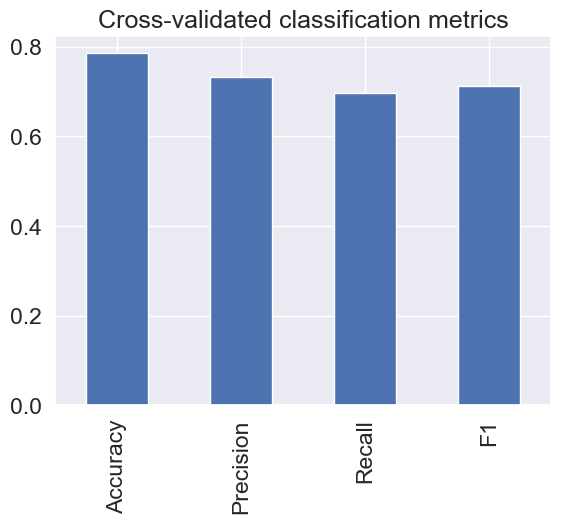

In [247]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"<br>

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [248]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=117.21022975334793,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [249]:
# Check coef_
clf.coef_

array([[-9.69963306e-01,  3.73953694e-04, -3.20971128e-02,
        -1.37648155e-01,  2.34951484e-03, -2.96099927e-01,
         2.44771060e+00, -2.86086916e-01,  2.63015003e-02,
        -1.07312284e-01, -4.20910728e-01]])

In [250]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'PassengerId': -0.969963306086744,
 'Survived': 0.0003739536937484818,
 'Pclass': -0.03209711281890441,
 'Name': -0.13764815541708458,
 'Sex': 0.0023495148421141983,
 'Age': -0.2960999274544436,
 'SibSp': 2.447710595563953,
 'Parch': -0.28608691642640033,
 'Ticket': 0.026301500280014472,
 'Fare': -0.10731228407950444,
 'Cabin': -0.4209107281470075}

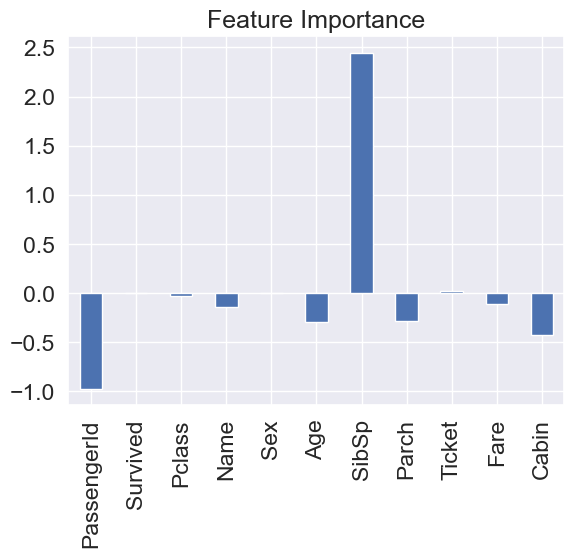

In [251]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?

## 7.Final Prediction

Doing prediction on unknown data...

## Load Data

In [252]:
df_fin = pd.read_csv("test.csv")
df_fin.shape # (rows, colums)

(418, 11)

Applying the same steps we did on training data 

In [253]:
df_fin.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [254]:
# Turn the categories into numbers
categorical_features_fin = ["Sex","Embarked"]
one_hot_fin = OneHotEncoder()
transformer_fin = ColumnTransformer([("one_hot_fin",one_hot_fin,categorical_features_fin)]
                               ,remainder = "passthrough")

transformed_df_fin = transformer_fin.fit_transform(df_fin)
transformed_df_fin

array([[0.0, 1.0, 0.0, ..., '330911', 7.8292, nan],
       [1.0, 0.0, 0.0, ..., '363272', 7.0, nan],
       [0.0, 1.0, 0.0, ..., '240276', 9.6875, nan],
       ...,
       [0.0, 1.0, 0.0, ..., 'SOTON/O.Q. 3101262', 7.25, nan],
       [0.0, 1.0, 0.0, ..., '359309', 8.05, nan],
       [0.0, 1.0, 1.0, ..., '2668', 22.3583, nan]], dtype=object)

In [255]:
pd.DataFrame(transformed_df_fin)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,1.0,0.0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN
1,1.0,0.0,0.0,0.0,1.0,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0,NaN
2,0.0,1.0,0.0,1.0,0.0,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN
3,0.0,1.0,0.0,0.0,1.0,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN
4,1.0,0.0,0.0,0.0,1.0,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0,1305,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.05,NaN
414,1.0,0.0,1.0,0.0,0.0,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9,C105
415,0.0,1.0,0.0,0.0,1.0,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.25,NaN
416,0.0,1.0,0.0,0.0,1.0,1308,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.05,NaN


In [256]:
new_df_fin = pd.get_dummies(df_fin[["Sex","Embarked","Pclass","PassengerId","Age","Parch","Fare","SibSp"]])
new_df_fin

,Pclass,PassengerId,Age,Parch,Fare,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,892,34.5,0,7.8292,0,0,1,0,1,0
1,3,893,47.0,0,7.0000,1,1,0,0,0,1
2,2,894,62.0,0,9.6875,0,0,1,0,1,0
3,3,895,27.0,0,8.6625,0,0,1,0,0,1
4,3,896,22.0,1,12.2875,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,3,1305,NaN,0,8.0500,0,0,1,0,0,1
414,1,1306,39.0,0,108.9000,0,1,0,1,0,0
415,3,1307,38.5,0,7.2500,0,0,1,0,0,1
416,3,1308,NaN,0,8.0500,0,0,1,0,0,1


In [257]:
# Fill the missing Numerical values
new_df_fin.isna().sum()

Pclass          0
PassengerId     0
Age            86
Parch           0
Fare            1
SibSp           0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [258]:
new_df_fin["Age"].fillna(new_df_fin["Age"].mean(),inplace=True ) 
new_df_fin["Fare"].fillna(new_df_fin["Fare"].mean(),inplace=True ) 

In [259]:
# Make predictions with tuned model
y_preds_fin = gs_log_reg.predict(new_df_fin)

In [263]:
# Creating the final prediction dataframe
fin_pred = pd.DataFrame({"PassengerId":df_fin["PassengerId"],"Survived":y_preds_fin})

In [267]:
# Converting the dataframe to .csv file and exporting it
fin_pred.to_csv("titanic_survivors.csv",index = "false")